
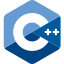
<br>

<div style="text-align:center; font-size:200%;">
 <b>Kopieren und Verschieben</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 01 Kopieren und Verschieben.ipynb -->
<!-- slides/module_150_classes/topic_190_copy_and_move.cpp -->


## Kopieren und Verschieben

- `MyVector`-Objekte werden korrekt zerstört und kopiert.
- Es werden potentiell zu viele Kopien erstellt.
- Das können wir verbessern, indem wir Move-Operationen für Vektoren
  implementieren.


- Vier Member-Funktionen für Kopieren und Verschieben:
  - Kopierkonstruktor (Copy Constructor)
  - Kopierzuweisungsoperator (Copy Assignment Operator)
  - Move-Konstruktor (Move Constructor)
  - Move-Zuweisungsoperator (Move Assignment Operator)


### Copy Constructor und Copy Assignment Operator

- Haben als Parameter eine (`const`)-Referenz auf ein Objekt der eigenen
  Klasse.
- Werden (oft) automatisch generiert, wenn sie nicht explizit implementiert
  werden.
  - Default: Member werden kopiert.
- Können explizit mit `= default` deklariert werden.
- Die Default-Implementierung kann mit `= delete` verhindert werden.


### Copy Constructor

- Wird aufgerufen, wenn ein Objekt mit einem anderen Objekt vom gleichen Typ
  initialisiert wird.

### Copy Assignment Operator

- Wird aufgerufen, wenn ein Objekt an ein anderes Objekt zugewiesen wird.
- Definition mit `operator=()`.
- Gibt eine Referenz auf `*this` zurück.

In [ ]:
#include <iostream>
#include <cmath>

In [ ]:
int index_for_copy(int i) {
    if (i <= 0) return -1;

    int num_digits{static_cast<int>(std::log10(i)) + 1};
    int last_digit{i % 10};
    int multiplier{static_cast<int>(std::pow(10, num_digits))};
    return last_digit * multiplier + i;
}

In [ ]:
struct Copyable {
    static int next_index() {
        static int result{0};
        return ++result;
    }

    int i;

    Copyable() : i{next_index()} {
        std::cout << "Copyable(" << i << ")\n";
    };

    Copyable(const Copyable& other) : i{index_for_copy(other.i)} {
        std::cout << "Copyable(" << i << "): copy constructor called. (Other = " << other.i << ")\n";
    };

    Copyable& operator=(const Copyable& other) {
        i = index_for_copy(other.i);
        std::cout << "Copyable(" << i << "): copy assignment operator called. (Other = " << other.i << ")\n";
        return *this;
    };

    ~Copyable() {
        std::cout << "~Copyable(" << i << ")\n";
    }
};

In [ ]:
Copyable c1{};

In [ ]:
Copyable c2{};

In [ ]:
c1 = c2;

In [ ]:
c1.i

In [ ]:
c2.i

In [ ]:
const Copyable c3{};

In [ ]:
Copyable c4{c3};

In [ ]:
c4.i

In [ ]:
c4.i = 44;

In [ ]:
c4.i


### Verschieben von Objekten

- Viele Objekte werden als Handles realisiert:
  - Kleine Struktur mit Zeiger auf großen Datenbereich.
  - Kopieren der Struktur ist billig, Kopieren der Daten teuer.
- In manchen Fällen kann man statt zu kopieren die Daten der Quelle "stehlen".
  - Das geht, wenn die Quelle nicht mehr benötigt wird.
  - Man muss die Quelle dabei in einem Zustand lassen, in dem der Destruktor
    aufgerufen werden kann.
- Diesen Vorgang nennt man "Verschieben" (move).


### Move-Konstruktor und Move-Zuweisungsoperator

- Haben als Parameter eine Rvalue-Referenz (`T&&`) auf ein Objekt der eigenen
  Klasse.
- Erlauben effizientes Verschieben von Objekten.
- Werden nicht implementiert, wenn Copy-Konstruktor oder
  Copy-Zuweisungsoperator explizit implementiert werden.
- Können explizit mit `= default` deklariert werden.
- Die Default-Implementierung kann mit `= delete` verhindert werden.


### Move-Konstruktor

- Wird aufgerufen, wenn ein Objekt mit einem Rvalue initialisiert wird.
- Rvalues sind grob gesagt Objekte, die nach ihrer Verwendung nicht mehr
  benötigt werden.

### Move-Zuweisungsoperator

- Wird aufgerufen, wenn ein Rvalue an ein Objekt zugewiesen wird.
- Definition mit `operator=()`.
- Gibt eine Referenz auf das eigene Objekt zurück.

In [ ]:
struct Movable {
    static int next_index() {
        static int result{0};
        return ++result;
    }
    int i;

    Movable() : i{next_index()} { std::cout << "Movable(" << i << ") constructed\n"; };

    Movable(const Movable& other) : i{index_for_copy(other.i)} {
        std::cout << "Movable(" << i << "): copy constructor called. (Other = " << other.i << ")\n";
    };
    Movable(Movable&& other) : i{index_for_copy(other.i)} {
        std::cout << "Movable(" << i << "): move constructor called. (Other = " << other.i << ")\n";
        other.i *= -1;
    };

    Movable& operator=(const Movable& other) {
        i = index_for_copy(other.i);
        std::cout << "Movable(" << i << "): copy assignment operator called. (Other = " << other.i << ")\n";
        return *this;
    };
    Movable& operator=(Movable&& other) {
        i = index_for_copy(other.i);
        std::cout << "Movable(" << i << "): move assignment operator called. (Other = " << other.i << ")\n";
        other.i *= -1;
        return *this;
    };

    ~Movable() { std::cout << "~Movable(" << i << ")\n"; }

    void print() const { std::cout << "Movable(" << i << ")\n"; }
};

In [ ]:
Movable make_movable()
{
    Movable m1{};
    Movable m2{};
    if (m1.i % 1234 == 0) {
        return m1;
    } else {
        return m2;
    }
}

In [ ]:
Movable m1{};

In [ ]:
Movable m2{m1};

In [ ]:
m1.print();
m2.print();

In [ ]:
m1 = m2;

In [ ]:
m1.print();
m2.print();

In [ ]:
Movable m3{make_movable()};

In [ ]:
m3 = make_movable();

In [ ]:
Movable m4{static_cast<Movable&&>(m3)};

In [ ]:
m3.print();
m4.print();

In [ ]:
Movable m5{std::move(m4)};

In [ ]:
m4.print();
m5.print();


## Mini-Workshop: Explizite Konstruktoren

Gegeben seien die folgenden Structs:

In [ ]:
#include <iostream>

struct B;
struct C;

struct A {
    A()                  { std::cout << "A()\n"; }
    A(int)               { std::cout << "A(int)\n"; }
    A(const A&)          { std::cout << "A(const A&)\n"; }
    A(A&&)               { std::cout << "A(A&&)\n"; }
    A(const B&)          { std::cout << "A(const B&)\n"; }
    A(B&&)               { std::cout << "A(B&&)\n"; }
};

struct B {
    B(const B&)          { std::cout << "B(const B&)\n"; }

    explicit B(int)      { std::cout << "B(int)\n"; }
    explicit B(const A&) { std::cout << "B(const A&)\n"; }
    B(const C&)          { std::cout << "B(const C&)\n"; }
};

struct C {
    C(const A&)          { std::cout << "C(const A&)\n"; }
    C(A&&)               { std::cout << "C(A&&)\n"; }
    C(const B&)          { std::cout << "C(const B&)\n"; }
}


Und die folgenden Funktionen:

In [ ]:
A f(A a) { std::cout << "f(A)\n"; return a; }

In [ ]:
B f(B b) { std::cout << "f(B)\n"; return b; }

In [ ]:
C f(C c) { std::cout << "f(C)\n"; return c; }

In [ ]:
A ga(A a) { std::cout << "ga(A)\n"; return a; }

In [ ]:
B gb(B b) { std::cout << "gb(B)\n"; return b; }

In [ ]:
C gc(C c) { std::cout << "gc(C)\n"; return c; }


Welche der folgenden Zeilen kompilieren? Was ist die Ausgabe?

In [ ]:
// A a0;

In [ ]:
// B b0;

In [ ]:
// A a1 = 5;

In [ ]:
// B b1 = 5;

In [ ]:
// A a2 = A{2};

In [ ]:
// B b2 = B{2};

In [ ]:
// A a3 = A{B{3}};

In [ ]:
// B b3 = C{B{A{}}};

In [ ]:
// A a4 = f(5);

In [ ]:
// B b4 = f(5);

In [ ]:
// C c4 = f(5);

In [ ]:
// A a5 = f(A{});

In [ ]:
// B b5 = f(B{1});

In [ ]:
// A a6 = ga(5);

In [ ]:
// B b6 = gb(5);

In [ ]:
// C c6 = gc(6);

In [ ]:
// A a7 = ga(B{7});

In [ ]:
// B b7 = gb(C{7});

In [ ]:
// A a8 = ga(C{8});

In [ ]:
// A a9 = f(ga(5));

In [ ]:
// B b9 = f(gb(C{5}));

In [ ]:
// C c9 = f(gb(C{5}));

In [ ]:
// A a;
// C c10 = f(gb(C{a}));

In [ ]:
// A a10 = ga(f(5));

In [ ]:
// B b10 = gb(f(5));